In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 9

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 9)                 99        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/3 [=========>....................] - ETA: 2s - loss: 2.1911 - accuracy: 0.1797
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 2s 200ms/step - loss: 2.2162 - accuracy: 0.1130 - val_loss: 2.1742 - val_accuracy: 0.0495
Epoch 2/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.1953 - accuracy: 0.1172
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 38ms/step - loss: 2.1740 - accuracy: 0.1163 - val_loss: 2.1608 - val_accuracy: 0.0792
Epoch 3/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.2364 - accuracy: 0.1328
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 43ms/step - loss: 2.1991 - accuracy: 0.1462 - val_loss: 2.1506 - val_accuracy: 0.0891
Epoch 4/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.1795 - accuracy: 0.1484
Epoch 4: sa

3/3 [==============================] - 0s 38ms/step - loss: 1.8925 - accuracy: 0.3289 - val_loss: 1.9227 - val_accuracy: 0.2178
Epoch 29/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8199 - accuracy: 0.3828
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 35ms/step - loss: 1.8630 - accuracy: 0.3389 - val_loss: 1.9036 - val_accuracy: 0.2475
Epoch 30/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.9111 - accuracy: 0.3047
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 32ms/step - loss: 1.8855 - accuracy: 0.3223 - val_loss: 1.8859 - val_accuracy: 0.2772
Epoch 31/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8881 - accuracy: 0.3359
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 34ms/step - loss: 1.8632 - accuracy: 0.3023 - val_loss: 1.

Epoch 56/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4756 - accuracy: 0.4844
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 33ms/step - loss: 1.4833 - accuracy: 0.4850 - val_loss: 1.4022 - val_accuracy: 0.5644
Epoch 57/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4626 - accuracy: 0.5234
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 33ms/step - loss: 1.4336 - accuracy: 0.5249 - val_loss: 1.3842 - val_accuracy: 0.5743
Epoch 58/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5118 - accuracy: 0.4062
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 33ms/step - loss: 1.4235 - accuracy: 0.4917 - val_loss: 1.3666 - val_accuracy: 0.5743
Epoch 59/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5140 - accuracy: 0.4844
Epoch

1/3 [=========>....................] - ETA: 0s - loss: 1.2440 - accuracy: 0.5547
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 34ms/step - loss: 1.1997 - accuracy: 0.5781 - val_loss: 1.0419 - val_accuracy: 0.6139
Epoch 84/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2324 - accuracy: 0.5234
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 33ms/step - loss: 1.1880 - accuracy: 0.5581 - val_loss: 1.0332 - val_accuracy: 0.6238
Epoch 85/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1830 - accuracy: 0.5469
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 31ms/step - loss: 1.2033 - accuracy: 0.5482 - val_loss: 1.0238 - val_accuracy: 0.6238
Epoch 86/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1578 - accuracy: 0.6250
Epoch 86: saving mo

1/3 [=========>....................] - ETA: 0s - loss: 0.8656 - accuracy: 0.6875
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 32ms/step - loss: 0.9988 - accuracy: 0.6346 - val_loss: 0.8654 - val_accuracy: 0.6535
Epoch 111/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0864 - accuracy: 0.5703
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 34ms/step - loss: 0.9834 - accuracy: 0.6379 - val_loss: 0.8613 - val_accuracy: 0.6634
Epoch 112/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1099 - accuracy: 0.6562
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 31ms/step - loss: 1.0419 - accuracy: 0.6312 - val_loss: 0.8564 - val_accuracy: 0.6634
Epoch 113/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0931 - accuracy: 0.5859
Epoch 113: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.9901 - accuracy: 0.6172
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 36ms/step - loss: 0.9211 - accuracy: 0.6412 - val_loss: 0.7837 - val_accuracy: 0.6832
Epoch 138/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8848 - accuracy: 0.6875
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 34ms/step - loss: 0.9450 - accuracy: 0.6478 - val_loss: 0.7809 - val_accuracy: 0.6832
Epoch 139/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9256 - accuracy: 0.6562
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 31ms/step - loss: 0.8893 - accuracy: 0.6777 - val_loss: 0.7764 - val_accuracy: 0.6733
Epoch 140/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0087 - accuracy: 0.5547
Epoch 140: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.8970 - accuracy: 0.6797
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 34ms/step - loss: 0.8696 - accuracy: 0.6811 - val_loss: 0.7153 - val_accuracy: 0.7030
Epoch 165/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8854 - accuracy: 0.6172
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 32ms/step - loss: 0.9518 - accuracy: 0.6113 - val_loss: 0.7157 - val_accuracy: 0.7624
Epoch 166/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8641 - accuracy: 0.6875
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 31ms/step - loss: 0.8524 - accuracy: 0.6711 - val_loss: 0.7161 - val_accuracy: 0.7525
Epoch 167/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8895 - accuracy: 0.6250
Epoch 167: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.8743 - accuracy: 0.6875
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 35ms/step - loss: 0.8661 - accuracy: 0.7076 - val_loss: 0.6800 - val_accuracy: 0.7426
Epoch 192/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9526 - accuracy: 0.6094
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 32ms/step - loss: 0.8461 - accuracy: 0.6777 - val_loss: 0.6766 - val_accuracy: 0.7723
Epoch 193/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8982 - accuracy: 0.6797
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 34ms/step - loss: 0.8690 - accuracy: 0.6777 - val_loss: 0.6729 - val_accuracy: 0.8020
Epoch 194/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8093 - accuracy: 0.7344
Epoch 194: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.8246 - accuracy: 0.6953
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 32ms/step - loss: 0.8386 - accuracy: 0.6977 - val_loss: 0.6281 - val_accuracy: 0.8218
Epoch 219/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8324 - accuracy: 0.6719
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 34ms/step - loss: 0.8055 - accuracy: 0.6944 - val_loss: 0.6270 - val_accuracy: 0.8416
Epoch 220/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8274 - accuracy: 0.6562
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 31ms/step - loss: 0.8181 - accuracy: 0.6645 - val_loss: 0.6263 - val_accuracy: 0.8416
Epoch 221/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8037 - accuracy: 0.6719
Epoch 221: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.7755 - accuracy: 0.6875
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 32ms/step - loss: 0.7482 - accuracy: 0.7110 - val_loss: 0.5894 - val_accuracy: 0.8515
Epoch 246/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7846 - accuracy: 0.7188
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 34ms/step - loss: 0.7666 - accuracy: 0.7076 - val_loss: 0.5883 - val_accuracy: 0.8614
Epoch 247/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7052 - accuracy: 0.7109
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 40ms/step - loss: 0.7674 - accuracy: 0.7110 - val_loss: 0.5872 - val_accuracy: 0.8416
Epoch 248/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6809 - accuracy: 0.7734
Epoch 248: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.8199 - accuracy: 0.7109
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 33ms/step - loss: 0.8085 - accuracy: 0.6877 - val_loss: 0.5697 - val_accuracy: 0.8614
Epoch 273/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7583 - accuracy: 0.6641
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 33ms/step - loss: 0.7397 - accuracy: 0.7110 - val_loss: 0.5714 - val_accuracy: 0.8614
Epoch 274/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7524 - accuracy: 0.6953
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 31ms/step - loss: 0.7654 - accuracy: 0.6777 - val_loss: 0.5727 - val_accuracy: 0.8713
Epoch 275/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7307 - accuracy: 0.7031
Epoch 275: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.7307 - accuracy: 0.7031
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 33ms/step - loss: 0.7215 - accuracy: 0.7010 - val_loss: 0.5369 - val_accuracy: 0.8515
Epoch 300/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7900 - accuracy: 0.7422
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 32ms/step - loss: 0.7510 - accuracy: 0.7143 - val_loss: 0.5332 - val_accuracy: 0.8515
Epoch 301/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7742 - accuracy: 0.7109
Epoch 301: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 32ms/step - loss: 0.7345 - accuracy: 0.7209 - val_loss: 0.5305 - val_accuracy: 0.8614
Epoch 302/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8251 - accuracy: 0.7656
Epoch 302: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.7644 - accuracy: 0.7188
Epoch 326: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 32ms/step - loss: 0.7796 - accuracy: 0.6977 - val_loss: 0.5224 - val_accuracy: 0.8713
Epoch 327/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7078 - accuracy: 0.7422
Epoch 327: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 33ms/step - loss: 0.7458 - accuracy: 0.7276 - val_loss: 0.5212 - val_accuracy: 0.8713
Epoch 328/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.5340 - accuracy: 0.8047
Epoch 328: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 33ms/step - loss: 0.6249 - accuracy: 0.7608 - val_loss: 0.5199 - val_accuracy: 0.8713
Epoch 329/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8117 - accuracy: 0.6953
Epoch 329: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.6929 - accuracy: 0.7188
Epoch 353: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 31ms/step - loss: 0.6856 - accuracy: 0.7475 - val_loss: 0.5182 - val_accuracy: 0.8713
Epoch 354/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7761 - accuracy: 0.6797
Epoch 354: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 32ms/step - loss: 0.7021 - accuracy: 0.7076 - val_loss: 0.5171 - val_accuracy: 0.8713
Epoch 355/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6886 - accuracy: 0.6953
Epoch 355: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 34ms/step - loss: 0.7647 - accuracy: 0.7076 - val_loss: 0.5154 - val_accuracy: 0.8713
Epoch 356/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6399 - accuracy: 0.7578
Epoch 356: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.6905 - accuracy: 0.7109
Epoch 380: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 33ms/step - loss: 0.7034 - accuracy: 0.7276 - val_loss: 0.4878 - val_accuracy: 0.8812
Epoch 381/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6510 - accuracy: 0.7422
Epoch 381: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 31ms/step - loss: 0.6936 - accuracy: 0.7409 - val_loss: 0.4895 - val_accuracy: 0.8713
Epoch 382/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7515 - accuracy: 0.7266
Epoch 382: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 31ms/step - loss: 0.7749 - accuracy: 0.6977 - val_loss: 0.4905 - val_accuracy: 0.8713
Epoch 383/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6262 - accuracy: 0.7500
Epoch 383: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.7429 - accuracy: 0.6953
Epoch 407: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 33ms/step - loss: 0.7141 - accuracy: 0.6944 - val_loss: 0.4749 - val_accuracy: 0.8713
Epoch 408/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7146 - accuracy: 0.7656
Epoch 408: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 31ms/step - loss: 0.6915 - accuracy: 0.7708 - val_loss: 0.4748 - val_accuracy: 0.8614
Epoch 409/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7060 - accuracy: 0.7109
Epoch 409: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 31ms/step - loss: 0.6880 - accuracy: 0.7409 - val_loss: 0.4740 - val_accuracy: 0.8614
Epoch 410/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6755 - accuracy: 0.7578
Epoch 410: sa

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 24ms/step - loss: 0.4736 - accuracy: 0.8614


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[8.8056456e-04 3.5190937e-04 4.0111486e-03 4.7698049e-06 7.6064564e-02
 2.4956701e-02 8.9355296e-01 1.6650422e-04 1.0949421e-05]
6


# 混同行列

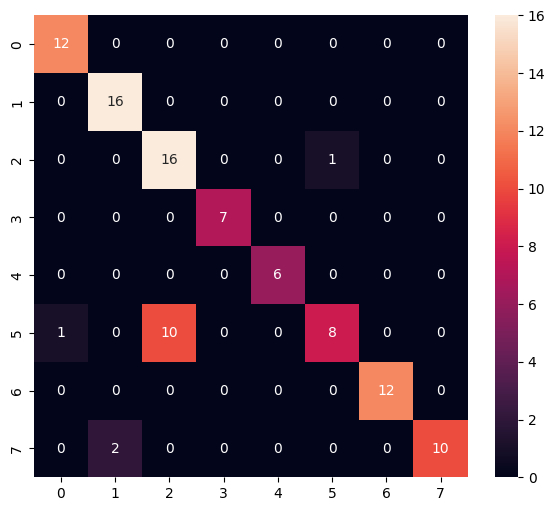

Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.89      1.00      0.94        16
           2       0.62      0.94      0.74        17
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         6
           5       0.89      0.42      0.57        19
           6       1.00      1.00      1.00        12
           7       1.00      0.83      0.91        12

    accuracy                           0.86       101
   macro avg       0.91      0.90      0.89       101
weighted avg       0.89      0.86      0.85       101



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmphzggaw14\assets


6496

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[8.8056416e-04 3.5190920e-04 4.0111449e-03 4.7697954e-06 7.6064572e-02
 2.4956694e-02 8.9355296e-01 1.6650408e-04 1.0949410e-05]
6
